# End to End Machine Learning Example

The data in this notebook is provided by [Kaggle.](https://www.kaggle.com/kmalit/bank-customer-churn-prediction)

We will be following the data science/machine learning typical project checklist:

1. [Define the problem](#prob)
1. [Get the Data](#getdata)
1. [Data Exploration](#explore)
1. [Feature Engineering](#feteng)
1. [Build Models](#buildms)
1. [Fine Tune Models](#finetune)
1. [Present solution](#present)
1. [Launch, Monitor and Maintain](#launch)

## Intro


In [33]:
# imports needed 

# standard python modules needed
import os
import pandas as pd 
import numpy as np 

# splitting data
from sklearn.model_selection import StratifiedShuffleSplit

# data visualisation
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix 

## 1. Define the problem <a id='prob'></a>

In this project, we are trying to 

## 2. Get the Data <a id='getdata'></a>

In [2]:
df_original = pd.read_csv('data/bank_customer.csv')
df_original.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
# create a copy of our dataframe
df = df_original.copy()

In [18]:
# lets do some cleanup - removing the ID, etc
redundant_columns = ['RowNumber', 'CustomerId', 'Surname']
df.drop(redundant_columns, axis=1, inplace=True)

## 3. Data Exploration <a id='explore'></a>

Lets begin by looking at an overview of the data.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


We are able to now tell:
- our data has no nulls
- we only have 10000 rows
- we have 14 columns
- data is split between int columns, floats and 3 object columns 

Now lets look at the numerical columns

In [20]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


lets have a look at our 'Exited' column.

In [21]:
df.Exited.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Our dominating class is where the customers do not Exit.

Lets visualise some of our columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed61019f50>,
      dtype=object)

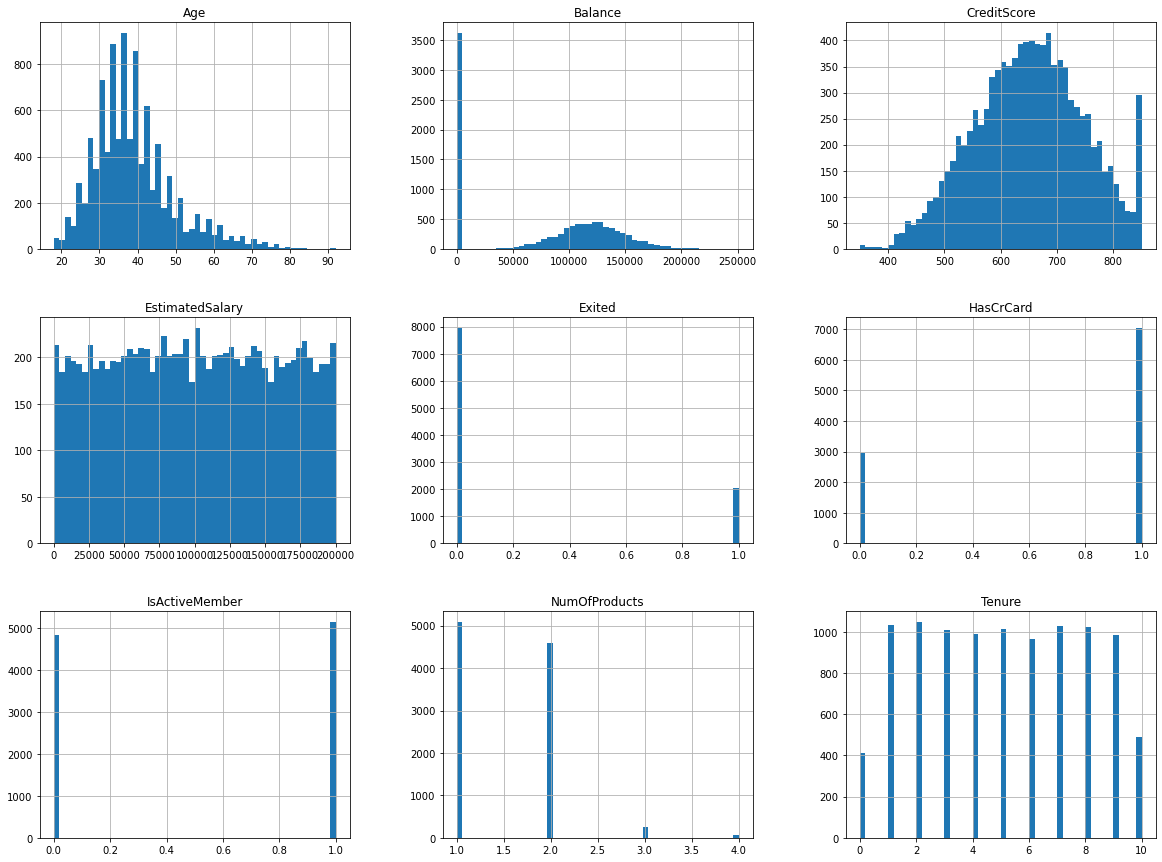

In [22]:
df.hist(bins=50, figsize=(20,15))

## 4. Feature Engineering <a id='feteng'></a>

before we begin any of our work, we will split the data, setting aside a certain percentage in order to reduce the chance of data snooping bias.

In [25]:
sss = StratifiedShuffleSplit(
    n_splits= 1,
    test_size= 0.2,
    random_state= 42
)

In [26]:
for train_index, test_index in sss.split(df, df.Exited):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [29]:
strat_train_set.Exited.value_counts(normalize=True)

0    0.79625
1    0.20375
Name: Exited, dtype: float64

Lets find the correlations....

In [30]:
corr_matrix = df.corr()

In [31]:
corr_matrix.Exited.sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed622dc950>,
      dtype=object)

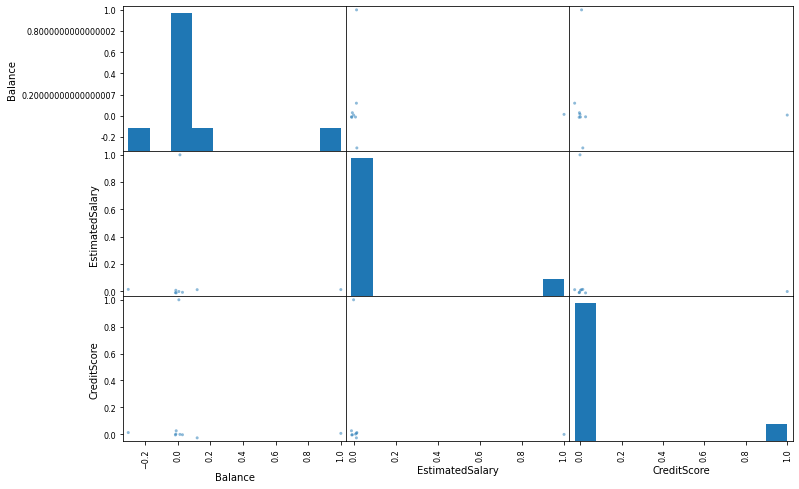

In [35]:
columns = ['Balance', 'EstimatedSalary', 'CreditScore']
scatter_matrix(corr_matrix[columns], figsize=(12,8))

Now if we create new fields, can we find any that are correlated to our target variable.

In [36]:
df['SalaryByAge'] = df.EstimatedSalary / df.Age

In [37]:
corr_matrix = df.corr()
corr_matrix.Exited.sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
SalaryByAge       -0.103080
IsActiveMember    -0.156128
Name: Exited, dtype: float64

lets create a copy of our original data

In [38]:
data = strat_train_set.drop('Exited', axis=1)
data_label = strat_train_set['Exited'].copy()

## 5. Build Models <a id='buildms'></a>

## 6. Fine Tune Models <a id='finetune'></a>

## 7. Present Solution <a id='present'></a>

## 8. Launch, Monitor and Maintain <a id='launch'></a>